# Lab 6: Clustering

In this assignment, we will learn two clustering methods: K-means and  Agglomerative method. 

Please first study the given example, which applies K-means and Agglomerative method to a toy dataset. 

Based on this example, your task is to apply K-means and Agglomerative method to the heart disease dataset. 


## 1. Example

### 1.1 Generate a toy dataset with two clusters

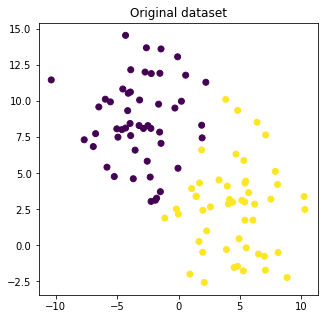

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets


# generate a toy dataset with two clusters
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=3.0, random_state=42)
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original dataset')
plt.show()

### 1.2 Partition the dataset with K-means 

Here, we use K-means method to partition this toy dataset. Then, to evaluate the clustering performance, we use two methods. The first one is to visualize the partitioned dataset. 

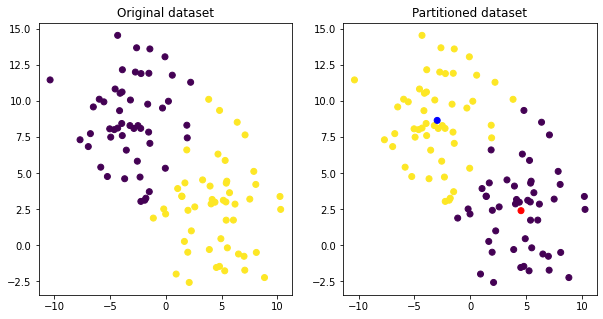

In [ ]:
cluster = KMeans(n_clusters=2, random_state=0).fit(X)

centroids = cluster.cluster_centers_  #get the clustering centroids

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original dataset')

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_)
plt.scatter(centroids[:, 0], centroids[:, 1], c=['r', 'b'])  #visualize the clustering centroids
plt.title('Partitioned dataset')

plt.show()



The second method to evaluate the clustering performance is to use [normalized mutual information (NMI)](https://course.ccs.neu.edu/cs6140sp15/7_locality_cluster/Assignment-6/NMI.pdf)
The larger value indicates the better performance. 


In [ ]:
from sklearn.metrics.cluster import normalized_mutual_info_score

nmi = normalized_mutual_info_score(cluster.labels_, y, average_method='arithmetic')
print('The normalized mutual information score of the K-means method is {:.4f}'.format(nmi))

The normalized mutual information score of the K-means method is 0.9291


### 1.3 Partition the dataset with Agglomerative method

Then, we use the Agglomerative method to partition the toy dataset.

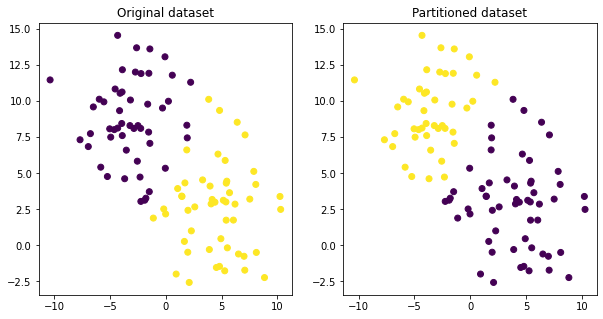

The normalized mutual information score of the Agglomerative method  is 0.6987


In [ ]:
cluster = AgglomerativeClustering(n_clusters=2).fit(X)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original dataset')

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_)
plt.title('Partitioned dataset')

plt.show()

nmi = normalized_mutual_info_score(cluster.labels_, y, average_method='arithmetic')
print('The normalized mutual information score of the Agglomerative method  is {:.4f}'.format(nmi))

## 2. Task

In this task, we still use the [heart disease](./heart.csv) dataset in Lab Assignment 5. 
Each sample has the following feature: 

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


**The task is to partition all users into two groups with K-means and Agglomerative methods.**

In [ ]:
# importing the necessary modules
import pandas as pd                     # for the dataframe
import matplotlib.pyplot as plt         # for various plots

In [ ]:
# constants
DATASET_FILENAME = r'heart.csv'     # filename of the dataset input

In [ ]:
# load the heart disease dataset
df = pd.read_csv(DATASET_FILENAME)
# get the # samples and dimensionality (d) of df
N_SAMPS, N_FEATS = df.shape
print(r"# samples = {}".format(N_SAMPS))
print(r"# features = {}".format(N_FEATS))
print(df.columns)

# split off the targets
y = df[df.columns[-1]]

# samples = 303
# features = 14
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


( 0, 1)( 2, 1)( 3, 1)( 4, 1)( 5, 1)( 6, 1)( 7, 1)( 8, 1)( 9, 1)(10, 1)(11, 1)(12, 1)
( 0,12)( 2,12)( 3,12)( 4,12)( 5,12)( 6,12)( 7,12)( 8,12)( 9,12)(10,12)(11,12)
( 0,11)( 2,11)( 3,11)( 4,11)( 5,11)( 6,11)( 7,11)( 8,11)( 9,11)(10,11)
( 0,10)( 2,10)( 3,10)( 4,10)( 5,10)( 6,10)( 7,10)( 8,10)( 9,10)
( 0, 9)( 2, 9)( 3, 9)( 4, 9)( 5, 9)( 6, 9)( 7, 9)( 8, 9)
( 0, 8)( 2, 8)( 3, 8)( 4, 8)( 5, 8)( 6, 8)( 7, 8)
( 0, 7)( 2, 7)( 3, 7)( 4, 7)( 5, 7)( 6, 7)
( 0, 6)( 2, 6)( 3, 6)( 4, 6)( 5, 6)
( 0, 5)( 2, 5)( 3, 5)( 4, 5)
( 0, 4)( 2, 4)( 3, 4)
( 0, 3)( 2, 3)
( 0, 2)


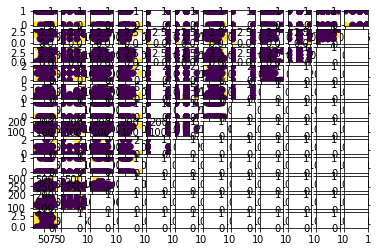

In [ ]:
# visualize the data

# number of X columns
N_X_COLS = (N_FEATS - 1)
# create square plot
fig, ax = plt.subplots(N_X_COLS - 1, N_X_COLS - 1)

# for each row in [1, [d..2]]
# (i_col, i_row) -> (X0, X1)
for i_row, iX1 in enumerate([1] + list(range((N_X_COLS - 1), 1, -1))):
    # calculate the number of rows
    N_COLS = iX1 if (iX1 != 1) else N_X_COLS
    # for each column [0, [2..N_COLS]]
    for i_col, iX0 in enumerate([0] + list(range(2, N_COLS))):
        # get the corresponding feature headers
        X0, X1 = tuple(df[df.columns[i]] for i in (iX0, iX1))
        # print the X as a progress bar
        print('({:2},{:2})'.format(iX0, iX1), end='')
        # plot these two features
        ax[i_row][i_col].scatter(X0, X1, c=y)
    # next i_col
    # label the row
    print()
# next i_row

plt.show()

### 2.1 Preprocess the raw data

* Check whether there are missing values
* Check whether theare are cateogrical features


In [ ]:
# your code

### 2.2 Partition the dataset with K-means and compute its NMI


In [ ]:
# your code

### 2.3 Partition the dataset with Agglomerative method and compute its NMI


In [ ]:
# your code